In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Jeu de données initial 
train = pd.read_json("train.json", lines = True)
test = pd.read_json("test.json", lines = True)

In [3]:
def dico_nbr(lst):
    """
    Fonction qui prend une liste de sequence de base/structure ou 
    prediction de loop et qui retourne un dictionnaire de nombre de chacune 
    des base ou type de structure.
        :Paramètres:
            lst = liste 
        :Return:
            un dico dont les clefs seront les base ou les structures et en valeurs
            le nombre de fois qu'il les trouves
    """
    seq_list = []
    for b in lst :
        if b not in lst:
            lst.append(b)

    dico = {}

    for b in lst:
        dico[b] = lst.count(b)
    
    return dico


def max_dstrb_df(df, col):
    """
    Fonction qui renvoie des dictionnaires dont les clefs sont le type de bases, le type de structures et le type de loop
    et en valeurs le nombre de fois qu'on les retrouve dans le data frame.
    Ce contage ce fait en fonction de la valeur maximum de la degradation/réactivité au autres variable à prédire.
        :Paramètres:
            df : train
            colonne du train : 'reactivity' par exemple
        :Return:
            3 dictionnaires contenant le nombre de bases, de type de structures et de type de loop 
    """
    base = []
    struct = []
    loop = []
    
    for line in df.iterrows():
        base.append(line[1]['sequence'][line[1][col].index(max(line[1][col]))])
        struct.append(line[1]['structure'][line[1][col].index(max(line[1][col]))])
        loop.append(line[1]['predicted_loop_type'][line[1][col].index(max(line[1][col]))])
    
    di_base = dico_nbr(base)
    di_strct = dico_nbr(struct)
    di_loop = dico_nbr(loop)

    
    return di_base, di_strct, di_loop

def min_dstrb_df(df, col):
    """
    Fonction qui renvoie ds dictionnaires dont les clefs sont le type de bases, le type de structures et le type de loop
    et en valeurs le nombre de fois qu'on les retrouve dans le data frame.
    Ce contage ce fait en fonction de la valeur minimum de la degradation/réactivité au autres variable à prédire.
        :Paramètres: 
            df : train
            colonne du train : 'reactivity' par exemple
        :Return:
            3 dictionnaires contenant le nombre de bases, de type de structures et de type de loop        
    """
    base = []
    struct = []
    loop = []
    
    for line in df.iterrows():
        base.append(line[1]['sequence'][line[1][col].index(min(line[1][col]))])
        struct.append(line[1]['structure'][line[1][col].index(min(line[1][col]))])
        loop.append(line[1]['predicted_loop_type'][line[1][col].index(min(line[1][col]))])
    
    di_base = dico_nbr(base)
    di_strct = dico_nbr(struct)
    di_loop = dico_nbr(loop)

    
    return di_base, di_strct, di_loop

In [4]:
max_base_rea, max_strct_rea, max_loop_rea = max_dstrb_df(train, "reactivity")
# min_base_rea, min_strct_rea, min_loop_rea = min_dstrb_df(train, "reactivity")

max_base_MGph, max_strct_MGph, max_loop_MGph = max_dstrb_df(train, "deg_Mg_pH10")
# min_base_MGph, min_strct_MGph, min_loop_MGph = min_dstrb_df(train, "deg_Mg_pH10")

max_base_ph, max_strct_ph, max_loop_ph = max_dstrb_df(train, "deg_pH10")
# min_base_ph, min_strct_ph, min_loop_ph = min_dstrb_df(train, "deg_pH10")

max_base_MG50, max_strct_MG50, max_loop_MG50 = max_dstrb_df(train, "deg_Mg_50C")
# min_base_MG50, min_strct_MG50, min_loop_MG50 = min_dstrb_df(train, "deg_Mg_50C")

max_base_50, max_strct_50, max_loop_50 = max_dstrb_df(train, "deg_50C")
# min_base_50, min_strct_50, min_loop_50 = min_dstrb_df(train, "deg_50C")

# Pour l'instant on cherche à savoir quelle base se dégrade le plus et pas celle qui protège de la dégradation. 
# On cherche donc que le maximum pour l'instant. Le min peut etre en perspective

In [5]:
# Transformation de en df pr ploter

df_base_rea_max = pd.DataFrame(max_base_rea.items(), columns = ['base', 'number'])
df_base_deg_max = pd.DataFrame(max_base_MGph.items(), columns = ['base', 'number'])

df_base_rea_max = df_base_rea_max.sort_values(by=['base'])
df_base_deg_max = df_base_deg_max.sort_values(by=['base'])

print(df_base_rea_max)
print(df_base_deg_max)

# new_df2 = pd.DataFrame(d_strct_ph.items(), columns=['struct', 'number'])

  base  number
0    A     981
3    C      50
2    G    1137
1    U     232
  base  number
2    A     689
3    C     112
0    G    1339
1    U     260


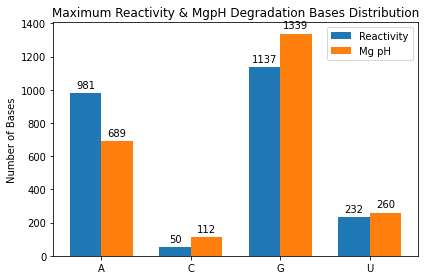

In [6]:
labels = df_base_rea_max['base']
rea = list(df_base_rea_max['number'])
mgph = list(df_base_deg_max['number'])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rea, width, label='Reactivity')
rects2 = ax.bar(x + width/2, mgph, width, label='Mg pH')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Bases')
ax.set_title('Maximum Reactivity & MgpH Degradation Bases Distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [7]:
df_base_rea_max = pd.DataFrame(max_base_rea.items(), columns = ['base', 'number'])
df_base_deg_max = pd.DataFrame(max_base_MGph.items(), columns = ['base', 'number'])

df_base_rea_max = df_base_rea_max.sort_values(by=['base'])
df_base_deg_max = df_base_deg_max.sort_values(by=['base'])

df_base_ph_max = pd.DataFrame(max_base_ph.items(), columns = ['base', 'number'])
df_base_mg_max = pd.DataFrame(max_base_MG50.items(), columns = ['base', 'number'])
df_base_50_max = pd.DataFrame(max_base_50.items(), columns = ['base', 'number'])

df_base_ph_max = df_base_ph_max.sort_values(by=['base'])
df_base_mg_max = df_base_mg_max.sort_values(by=['base'])
df_base_50_max = df_base_50_max.sort_values(by=['base'])


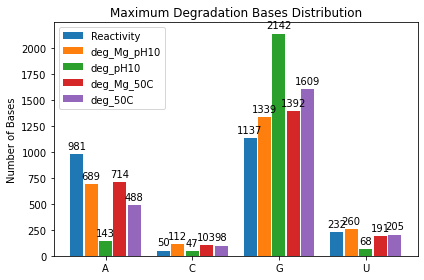

In [8]:
labels = df_base_rea_max['base']
rea = list(df_base_rea_max['number'])
mgph = list(df_base_deg_max['number'])
ph = list(df_base_ph_max['number'])
mg = list(df_base_mg_max['number'])
c50 = list(df_base_50_max['number'])

#x = np.arange(len(labels))  # the label locations
lst = [2, 5, 8, 11]
x = np.array(lst)
#print(x)
width = 0.45  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - 1, rea, width, label='Reactivity')
rects2 = ax.bar(x - 0.5, mgph, width, label='deg_Mg_pH10')
rects3 = ax.bar(x + 0.00, ph, width, label='deg_pH10')
rects4 = ax.bar(x + 0.5, mg, width, label='deg_Mg_50C')
rects5 = ax.bar(x + 1, c50, width, label='deg_50C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Bases')
ax.set_title('Maximum Degradation Bases Distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

plt.show()

In [9]:
df_strct_rea_max = pd.DataFrame(max_strct_rea.items(), columns = ['structure', 'number'])
df_strct_deg_max = pd.DataFrame(max_strct_MGph.items(), columns = ['structure', 'number'])

df_strct_rea_max = df_strct_rea_max.sort_values(by=['structure'])
df_strct_deg_max = df_strct_deg_max.sort_values(by=['structure'])

df_strct_ph_max = pd.DataFrame(max_strct_ph.items(), columns = ['structure', 'number'])
df_strct_mg_max = pd.DataFrame(max_strct_MG50.items(), columns = ['structure', 'number'])
df_strct_50_max = pd.DataFrame(max_strct_50.items(), columns = ['structure', 'number'])

df_strct_ph_max = df_strct_ph_max.sort_values(by=['structure'])
df_strct_mg_max = df_strct_mg_max.sort_values(by=['structure'])
df_strct_50_max = df_strct_50_max.sort_values(by=['structure'])

df_strct_rea_max

,structure,number
1,(,112
2,),75
0,.,2213


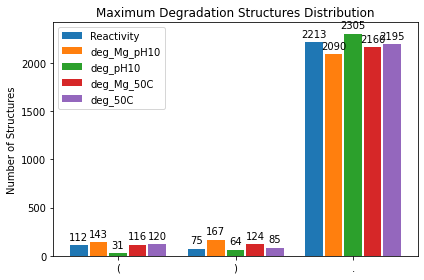

In [10]:
labels = df_strct_rea_max['structure']
rea = list(df_strct_rea_max['number'])
mgph = list(df_strct_deg_max['number'])
ph = list(df_strct_ph_max['number'])
mg = list(df_strct_mg_max['number'])
c50 = list(df_strct_50_max['number'])

#x = np.arange(len(labels))  # the label locations
lst = [2, 5, 8]
x = np.array(lst)
width = 0.45  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - 1, rea, width, label='Reactivity')
rects2 = ax.bar(x - 0.5, mgph, width, label='deg_Mg_pH10')
rects3 = ax.bar(x + 0.00, ph, width, label='deg_pH10')
rects4 = ax.bar(x + 0.5, mg, width, label='deg_Mg_50C')
rects5 = ax.bar(x + 1, c50, width, label='deg_50C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Structures')
ax.set_title('Maximum Degradation Structures Distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

plt.show()

In [11]:
df_loop_rea_max = pd.DataFrame(max_loop_rea.items(), columns = ['loop_type', 'number'])
df_loop_deg_max = pd.DataFrame(max_loop_MGph.items(), columns = ['loop_type', 'number'])

df_loop_rea_max = df_loop_rea_max.sort_values(by=['loop_type'])
df_loop_deg_max = df_loop_deg_max.sort_values(by=['loop_type'])

df_loop_ph_max = pd.DataFrame(max_loop_ph.items(), columns = ['loop_type', 'number'])
df_loop_mg_max = pd.DataFrame(max_loop_MG50.items(), columns = ['loop_type', 'number'])
df_loop_50_max = pd.DataFrame(max_loop_50.items(), columns = ['loop_type', 'number'])

df_loop_ph_max = df_loop_ph_max.sort_values(by=['loop_type'])
df_loop_mg_max = df_loop_mg_max.sort_values(by=['loop_type'])
df_loop_50_max = df_loop_50_max.sort_values(by=['loop_type'])

df_loop_50_max

,loop_type,number
5,B,14
0,E,1934
3,H,145
6,I,50
4,M,21
1,S,205
2,X,31


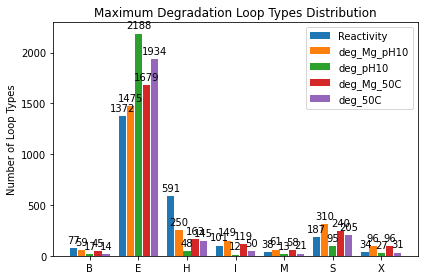

In [12]:
labels = df_loop_rea_max['loop_type']
rea = list(df_loop_rea_max['number'])
mgph = list(df_loop_deg_max['number'])
ph = list(df_loop_ph_max['number'])
mg = list(df_loop_mg_max['number'])
c50 = list(df_loop_50_max['number'])

#x = np.arange(len(labels))  # the label locations
lst = [2, 5, 8, 11, 14, 17, 20]
x = np.array(lst)
width = 0.45  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - 1, rea, width, label='Reactivity')
rects2 = ax.bar(x - 0.5, mgph, width, label='deg_Mg_pH10')
rects3 = ax.bar(x + 0.00, ph, width, label='deg_pH10')
rects4 = ax.bar(x + 0.5, mg, width, label='deg_Mg_50C')
rects5 = ax.bar(x + 1, c50, width, label='deg_50C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Loop Types')
ax.set_title('Maximum Degradation Loop Types Distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

plt.show()

In [17]:
rea_lst = []
mgph_lst = []
mg50c_lst = []

for line in train.iterrows():
    rea_lst.append(np.mean(line[1]['reactivity']))
    mgph_lst.append(np.mean(line[1]['deg_Mg_pH10']))
    mg50c_lst.append(np.mean(line[1]['deg_Mg_50C']))

len(mgph_lst)

2400

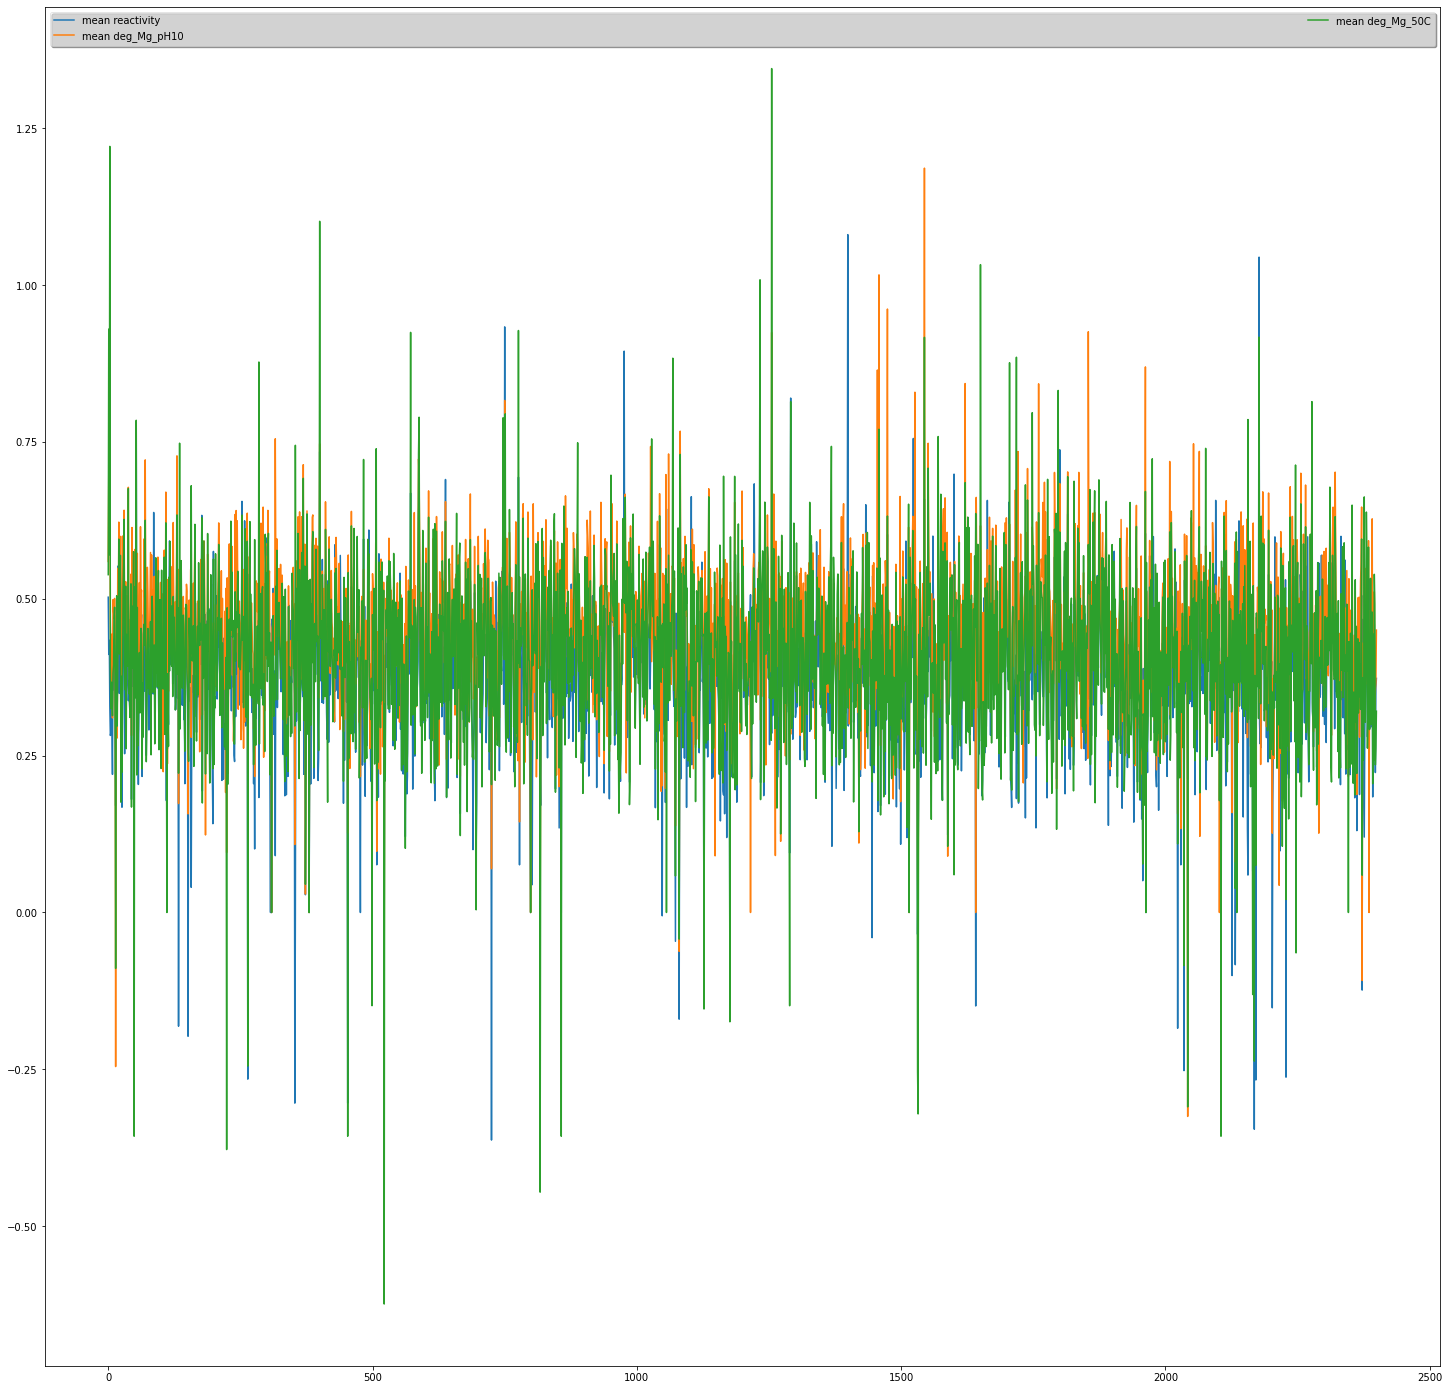

In [23]:
from matplotlib.pyplot import figure

figure(figsize=(25,25))

ax = plt.subplot(111)
x = np.arange(0, 2400)

plt.plot(x, rea_lst, label="mean reactivity")
plt.plot(x, mgph_lst, label="mean deg_Mg_pH10")
plt.plot(x, mg50c_lst, label="mean deg_Mg_50C")

leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)


plt.show()

In [30]:
#from scipy.stats.stats import pearsonr

#print(pearsonr(mgph_lst, mg50c_lst)[0])
#print(pearsonr(mgph_lst, rea_lst)[0])
#print(pearsonr(rea_lst, mg50c_lst)[0])


print("correlation coefficient between MgpH degradation and Mg50C degradation :",np.corrcoef(mgph_lst, mg50c_lst)[0, 1])
print("correlation coefficient between MgpH degradation and reactivity :",np.corrcoef(mgph_lst, rea_lst)[0, 1])
print("correlation coefficient between Mg50C degradation and reactivity :",np.corrcoef(rea_lst, mg50c_lst)[0, 1])

# se rapproche de 1 donc correlation ?

correlation coefficient between MgpH degradation and Mg50C degradation : 0.7226038330795415
correlation coefficient between MgpH degradation and reactivity : 0.6248657274494288
correlation coefficient between Mg50C degradation and reactivity : 0.643630663799499
